# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(query_url + city).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url["name"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_url["coord"]["lat"]
        city_lng = city_url["coord"]["lon"]
        city_max_temp= city_url['main']['temp_max']
        city_humidity = city_url["main"]["humidity"]
        city_clouds = city_url["clouds"]["all"]
        city_wind = city_url["wind"]["speed"]
        city_country = city_url["sys"]["country"]
        city_date = city_url["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                        "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | yinzhu
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | oruro
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | winslow
Processing Record 12 of Set 1 | rabaul
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | egilsstadir
Processing Record 18 of Set 1 | les avirons
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | toliara
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | awjilah
Processing Record

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.45,84,96,16.59,TF,1686501265
1,iqaluit,63.7506,-68.5145,1.85,80,100,7.20,CA,1686501266
2,dudinka,69.4058,86.1778,10.90,50,71,7.30,RU,1686501266
3,grytviken,-54.2811,-36.5092,-1.53,87,97,5.39,GS,1686501266
4,yinzhu,35.8786,119.9753,19.79,72,87,1.54,CN,1686501266


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.45,84,96,16.59,TF,1686501265
1,iqaluit,63.7506,-68.5145,1.85,80,100,7.20,CA,1686501266
2,dudinka,69.4058,86.1778,10.90,50,71,7.30,RU,1686501266
3,grytviken,-54.2811,-36.5092,-1.53,87,97,5.39,GS,1686501266
4,yinzhu,35.8786,119.9753,19.79,72,87,1.54,CN,1686501266


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

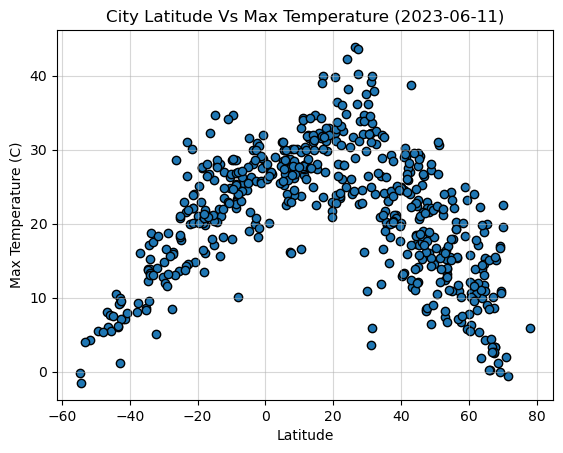

In [49]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors= "black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Max Temperature (2023-06-11)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True, alpha= 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

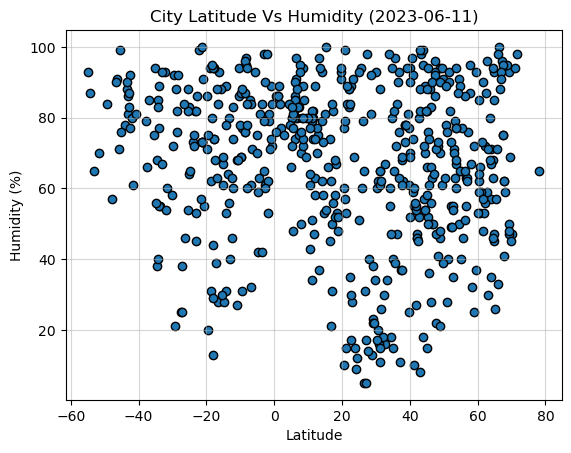

In [50]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Humidity (2023-06-11)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True, alpha= 0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

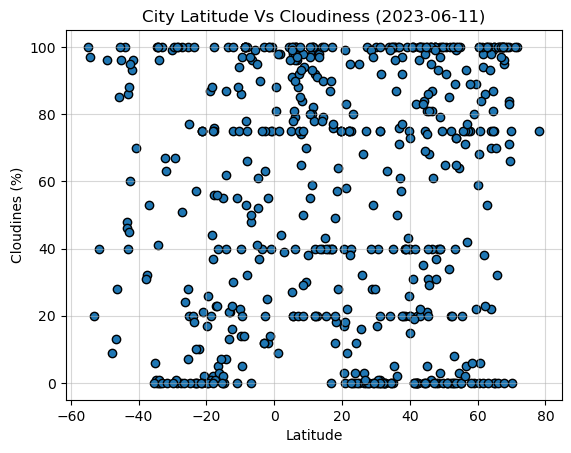

In [51]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors= "black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Cloudiness (2023-06-11)")
plt.ylabel("Cloudines (%)")
plt.xlabel("Latitude")
plt.grid(True, alpha= 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

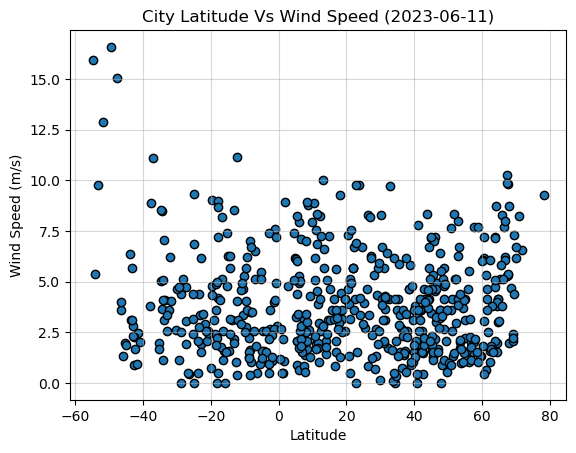

In [52]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Wind Speed (2023-06-11)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True, alpha= 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
x_values= city_data_df["Lat"]
y_values= city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,1.85,80,100,7.20,CA,1686501266
2,dudinka,69.4058,86.1778,10.90,50,71,7.30,RU,1686501266
4,yinzhu,35.8786,119.9753,19.79,72,87,1.54,CN,1686501266
7,nemuro,43.3236,145.5750,11.45,98,100,4.13,JP,1686501266
8,bilibino,68.0546,166.4372,15.07,59,100,1.98,RU,1686501266


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.45,84,96,16.59,TF,1686501265
3,grytviken,-54.2811,-36.5092,-1.53,87,97,5.39,GS,1686501266
5,pisco,-13.7000,-76.2167,22.03,64,100,3.09,PE,1686501212
6,oruro,-17.9833,-67.1500,13.46,13,2,4.17,BO,1686501266
9,hithadhoo,-0.6000,73.0833,28.68,72,75,2.82,MV,1686501267


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6934689751618228


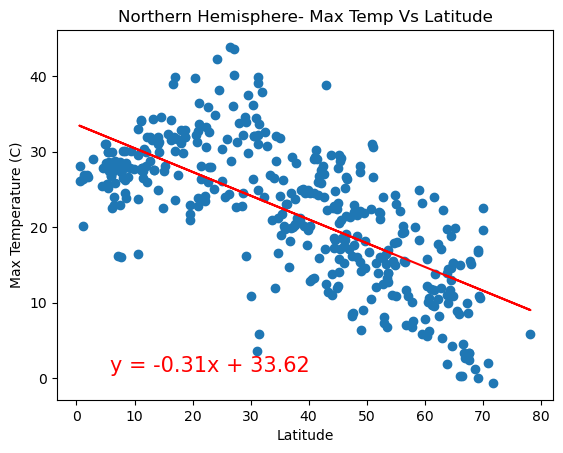

In [81]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Northern Hemisphere- Max Temp Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-value is: {rvalue}")
plt.show()


The r-value is: 0.8389728545064177


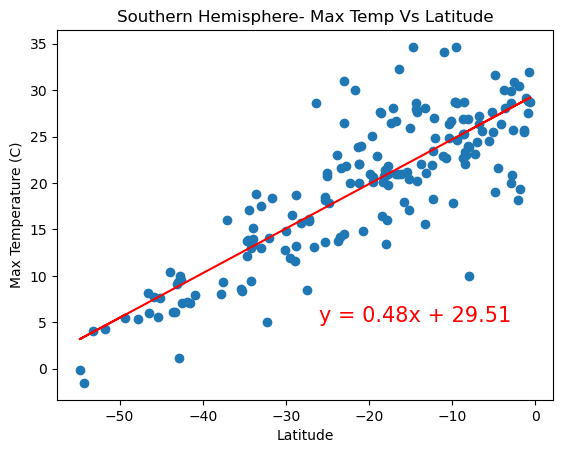

In [80]:
# Linear regression on Southern Hemisphere

x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-26, 5), fontsize=15,color="red")
plt.title('Southern Hemisphere- Max Temp Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere there is a medium negative correlation between Max Temperature and Latitude and for the Southern Hemisphere there is a strong positive correlation between Max Temperature and Lattitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.06757137482951896


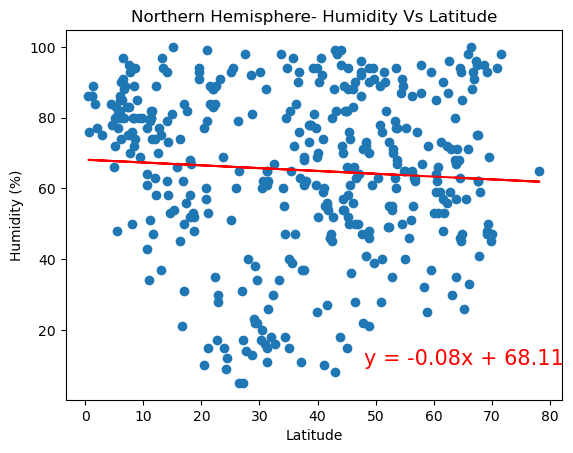

In [79]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,10),fontsize=15,color="red")
plt.title('Northern Hemisphere- Humidity Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.0866437571784074


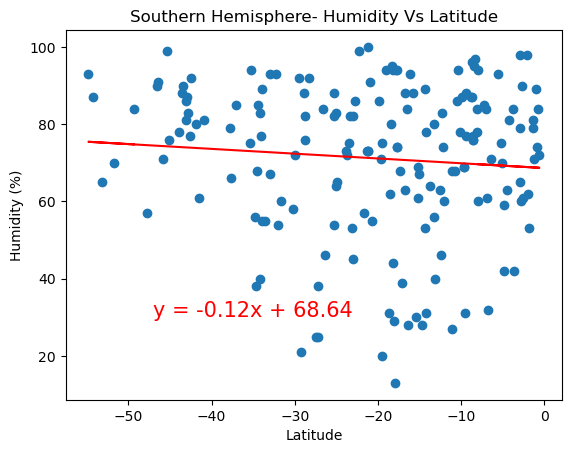

In [78]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-47, 30), fontsize=15,color="red")
plt.title('Southern Hemisphere- Humidity Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** For both the Northern and the Southern Hemispheres, there is no correlation between Humidity and Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.00811789531914324


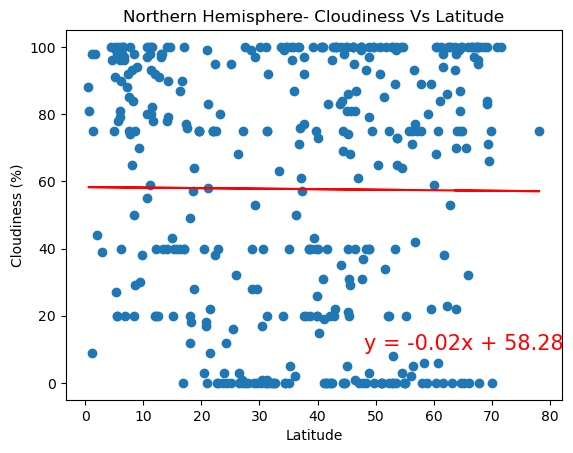

In [82]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,10),fontsize=15,color="red")
plt.title('Northern Hemisphere- Cloudiness Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.005089682105978508


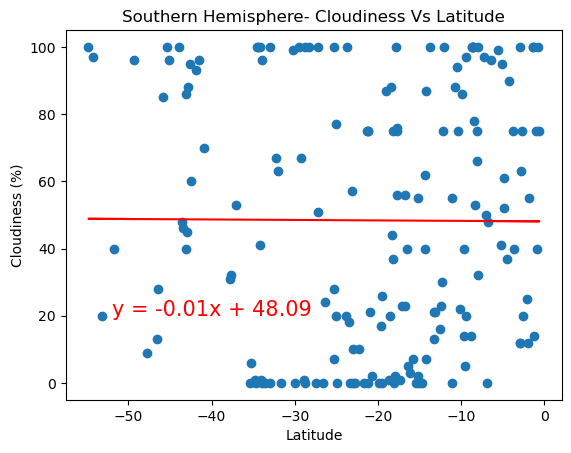

In [85]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-52, 20), fontsize=15,color="red")
plt.title('Southern Hemisphere- Cloudiness Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** For both the Northern and the Southern Hemispheres, there is no correlation between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04376628236110741


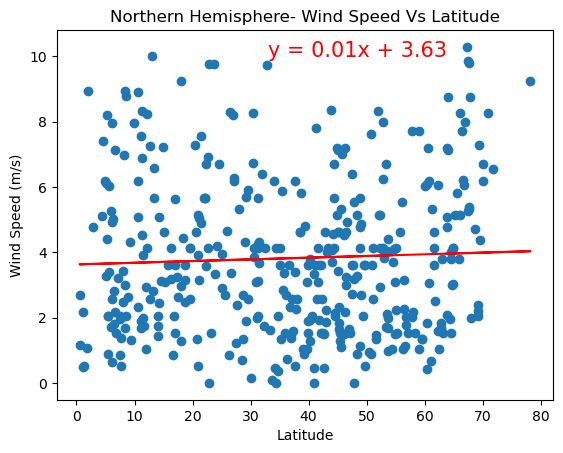

In [91]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(33,10),fontsize=15,color="red")
plt.title('Northern Hemisphere- Wind Speed Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.25770603610770515


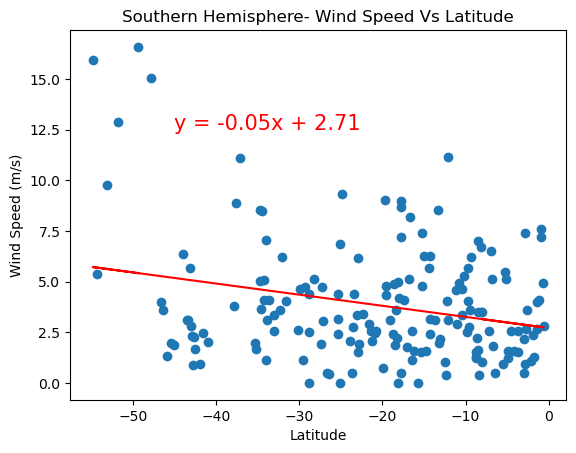

In [89]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-45, 12.5), fontsize=15,color="red")
plt.title('Southern Hemisphere- Wind Speed Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** I would say there is a very very weak positive correlation for the Northern Hemisphere and slight negative correlation for the Southern Hemisphere between wind speed and latitude.